In [5]:
from Implementaci√≥n.BinarySearchTree import BinarySearchTree
from Implementaci√≥n.BinaryTree import BinaryTree
from Implementaci√≥n.BNode import BNode
import networkx as nx
import matplotlib.pyplot as plt

In [33]:
# M√©todos para dibujar el √°rbol
def add_edges(root, graph, pos, x=0, y=0, layer=1, dx=1.0, dy=1.0):
    if root is not None:
        pos[root.getData()] = (x, -layer)
        if root.getLeft() is not None:
            graph.add_edge(root.getData(), root.getLeft().getData())
            add_edges(root.getLeft(), graph, pos, x - dx / 2, y - dy, layer + 1, dx / 2, dy)
        if root.getRight() is not None:
            graph.add_edge(root.getData(), root.getRight().getData())
            add_edges(root.getRight(), graph, pos, x + dx / 2, y - dy, layer + 1, dx / 2, dy)


def draw_binary_tree(raiz):
    graph = nx.Graph()
    pos = {}
    graph.add_node(raiz.getData())
    add_edges(raiz, graph, pos)

    options = {
        "node_color": "skyblue",
        "node_size": 1000,
        "with_labels": True,
        "font_size": 10,
        "font_color": "black",
        "font_weight": "bold",
        "width": 2,
    }

    nx.draw(graph, pos, **options)
    plt.show()
    
def add_edges_bst(root, graph, pos, x=0, y=0, layer=1, dx=1.0, dy=1.0):
    if root is not None:
        pos[root.getData().getData()] = (x, -layer)
        if root.getLeft() is not None:
            graph.add_edge(root.getData().getData(), root.getLeft().getData().getData())
            add_edges_bst(root.getLeft(), graph, pos, x - dx / 2, y - dy, layer + 1, dx / 2, dy)
        if root.getRight() is not None:
            graph.add_edge(root.getData().getData(), root.getRight().getData().getData())
            add_edges_bst(root.getRight(), graph, pos, x + dx / 2, y - dy, layer + 1, dx / 2, dy)
    
def draw_binary_search_tree(raiz):
    graph = nx.Graph()
    pos = {}
    graph.add_node(raiz.getData().getData())
    add_edges_bst(raiz, graph, pos)

    options = {
        "node_color": "skyblue",
        "node_size": 1000,
        "with_labels": True,
        "font_size": 10,
        "font_color": "black",
        "font_weight": "bold",
        "width": 2,
    }

    nx.draw(graph, pos, **options)
    plt.show()

# Ejercicio 1
Dado un Arreglo de n√∫meros ordenado, dise√±e un algoritmo recursivo que cree un √Årbol de B√∫squeda Binario balanceado con los elementos del Arreglo. Su algoritmo debe correr en ùëÇ(n), donde n es el n√∫mero de elementos en el arreglo. (hint: el elemento medio del arreglo deber√≠a ser la ra√≠z del √°rbol)

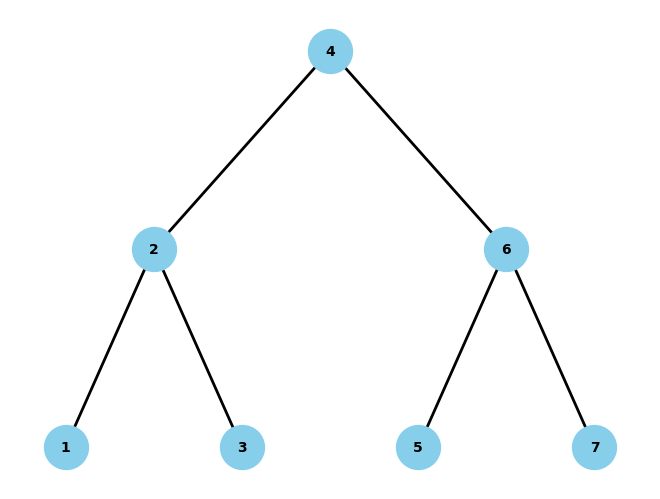

In [23]:
def createBST(arr):
    if len(arr) == 0:
        return None
    else:
        mid = len(arr) // 2
        root = BNode(arr[mid])
        root.setLeft(createBST(arr[:mid]))
        root.setRight(createBST(arr[mid+1:]))
        return root
    
# Ejemplo de uso
arr = [1, 2, 3, 4, 5, 6, 7]
root = createBST(arr)
draw_binary_tree(root)

# Ejercicio 2
Dado un √Årbol Binario de B√∫squeda y un intervalo [low, high], pode el √°rbol de modo que todos sus elementos se encuentren en [low, high]. El podado del √°rbol no debe cambiar la estructura relativa de los elementos que seguir√°n en el √°rbol (es decir, cualquier descendiente de un nodo debe seguir siendo descendiente de dicho nodo).

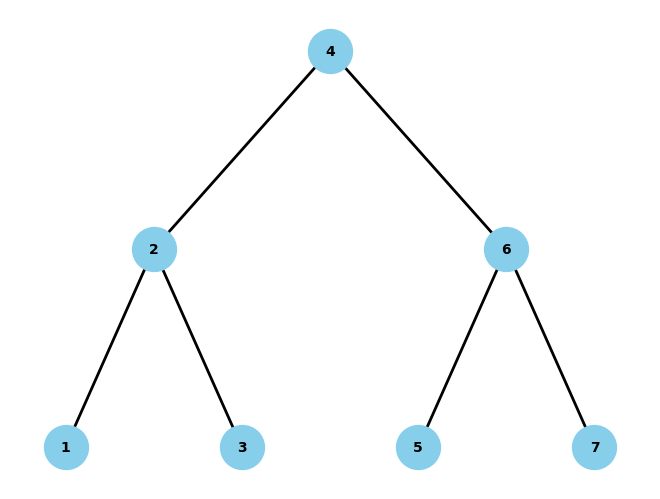

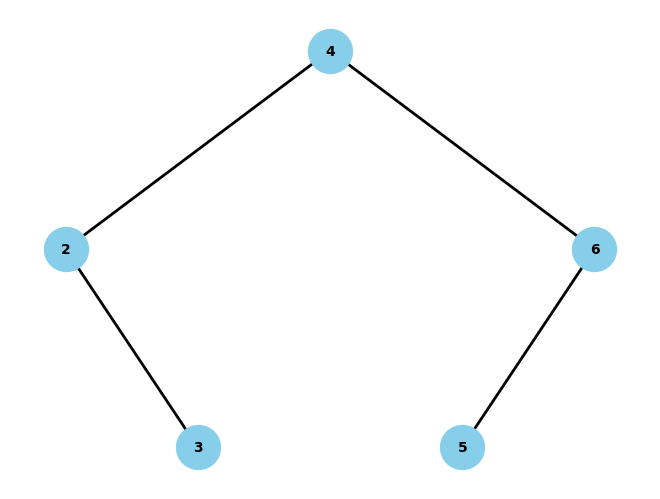

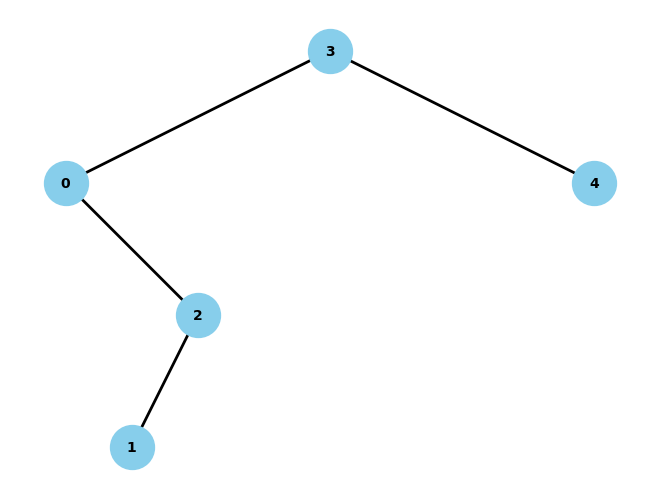

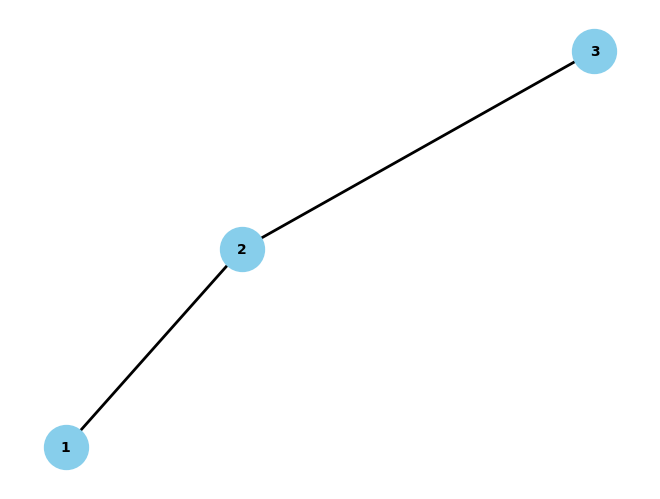

In [36]:
def pruneBST(root, low, high):
    if root is None:
        return None
    else:
        root.setLeft(pruneBST(root.getLeft(), low, high))
        root.setRight(pruneBST(root.getRight(), low, high))
        if root.getData().getData() < low:
            return root.getRight()
        elif root.getData().getData() > high:
            return root.getLeft()
        else:
            return root
        
# Ejemplo de uso
arbol = BinarySearchTree()
arbol.insert(4, 4)
arbol.insert(2, 2)
arbol.insert(6, 6)
arbol.insert(1, 1)
arbol.insert(3, 3)
arbol.insert(5, 5)
arbol.insert(7, 7)
root = arbol.root()
draw_binary_search_tree(root)
root = pruneBST(root, 2, 6)
draw_binary_search_tree(root)

# Ejemplo de uso
arbol = BinarySearchTree()
arbol.insert(3, 3)
arbol.insert(0, 0)
arbol.insert(4, 4)
arbol.insert(2, 2)
arbol.insert(1, 1)
root = arbol.root()
draw_binary_search_tree(root)
root = pruneBST(root, 1, 3)
draw_binary_search_tree(root)

# Ejercicio 3
Dado un √Årbol Binario de B√∫squeda y un intervalo [low, high], dise√±e y analice un algoritmo que devuelva la suma de los valores de todos los nodos cuyo valor est√© el rango [low, high].

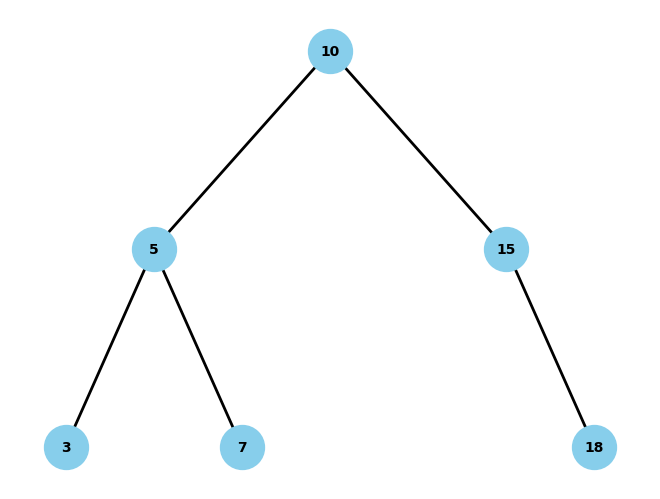

32


In [42]:
def sumBST(root, low, high):
    if root is None:
        return 0
    else:
        if root.getData().getData() < low:
            return sumBST(root.getRight(), low, high)
        elif root.getData().getData() > high:
            return sumBST(root.getLeft(), low, high)
        else:
            return root.getData().getData() + sumBST(root.getLeft(), low, high) + sumBST(root.getRight(), low, high)
        
# Ejemplo de uso
arbol = BinarySearchTree()
arbol.insert(10, 10)
arbol.insert(5, 5)
arbol.insert(15, 15)
arbol.insert(3, 3)
arbol.insert(7, 7)
arbol.insert(18, 18)
root = arbol.root()
draw_binary_search_tree(root)
print(sumBST(root, 7, 15)) # 32

# Ejercicio 4
Resuelva las siguientes preguntas en orden:
1. Dado un √Årbol Binario de B√∫squeda, cree un algoritmo que balancee este √°rbol usando las operaciones Left Rotation y Right Rotation vistas en clase. Un √°rbol binario de b√∫squeda est√° balanceado si para todos los nodos, la profundidad de sus dos sub√°rboles nunca difiere en m√°s de 1.
2. Consulte sobre los √Årboles AVL, el primer √°rbol de b√∫squeda binario auto balanceable que se ide√≥. Consulte sus operaciones b√°sicas y complejidad de estas.

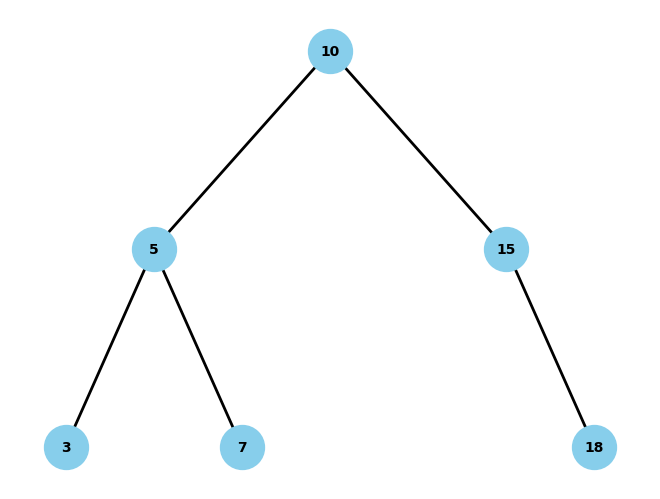

AttributeError: 'NoneType' object has no attribute 'getLeft'

In [46]:
def leftRotation(T, x):
    y = T.right(x)
    T.insertRight(x, T.left(y))
    if T.parent(x) is None:
        T.setRoot(y)
    else:
        if T.left(T.parent(x)) == x:
            T.insertLeft(T.parent(x), y)
        else:
            T.insertRight(T.parent(x), y)
    T.insertLeft(y, x)
    
def rightRotation(T, y):
    x = T.left(y)
    T.insertLeft(y, T.right(x))
    if T.parent(y) is None:
        T.setRoot(x)
    else:
        if T.left(T.parent(y)) == y:
            T.insertLeft(T.parent(y), x)
        else:
            T.insertRight(T.parent(y), x)
    T.insertRight(x, y)

# Soluci√≥n
def balanceBST(T, x):
    if T.left(x) is not None:
        balanceBST(T, T.left(x))
    if T.right(x) is not None:
        balanceBST(T, T.right(x))
    if T.left(x) is not None and T.right(x) is not None:
        if T.height(T.left(x)) - T.height(T.right(x)) > 1:
            rightRotation(T, x)
        elif T.height(T.right(x)) - T.height(T.left(x)) > 1:
            leftRotation(T, x)
            
# Ejemplo de uso
arbol = BinarySearchTree()
arbol.insert(10, 10)
arbol.insert(5, 5)
arbol.insert(15, 15)
arbol.insert(3, 3)
arbol.insert(7, 7)
arbol.insert(18, 18)
root = arbol.root()
draw_binary_search_tree(root)
balanceBST(arbol, root)
root = arbol.root()
draw_binary_search_tree(root)

# Soluci√≥n 2


# Ejercicio 5
Dado un √Årbol Binario de B√∫squeda, y un n√∫mero natural k, dise√±e y analice un algoritmo que devuelva el k-√©simo elemento m√°s peque√±o del √°rbol dado.

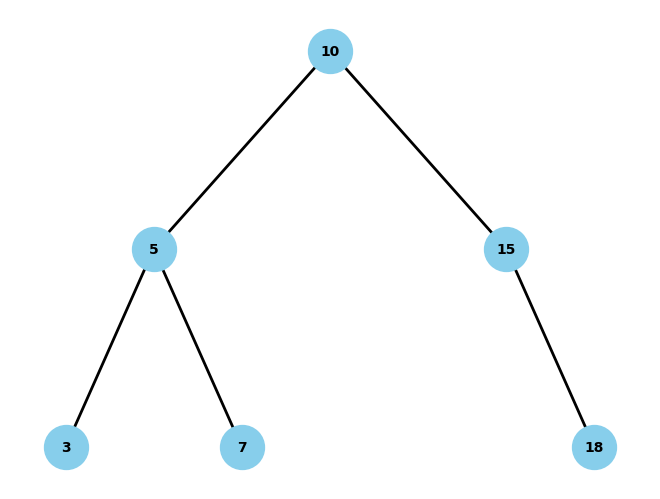

7


In [51]:
def kth_smallest_element(T, k):
        stack = []
        current = T.root()
        count = 0

        while stack or current:
            while current:
                stack.append(current)
                current = current.getLeft()

            current = stack.pop()
            count += 1

            if count == k:
                return current.getData().getData()  # Suponiendo que cada nodo tiene un campo "data"

            current = current.getRight()

        return None  # Si k es mayor que el n√∫mero total de nodos en el √°rbol
        
# Ejemplo de uso
arbol = BinarySearchTree()
arbol.insert(10, 10)
arbol.insert(5, 5)
arbol.insert(15, 15)
arbol.insert(3, 3)
arbol.insert(7, 7)
arbol.insert(18, 18)
root = arbol.root()
draw_binary_search_tree(root)
print(kth_smallest_element(arbol, 3)) # 7

# Ejercicio 6
Retome el problema 5. de encontrar el k-√©simo elemento m√°s peque√±o de un √°rbol binario de b√∫squeda. Consulte c√≥mo es posible aumentar un √Årbol Red Black para que esta operaci√≥n se pueda realizar eficientemente. (hint: aumentar quiere decir guardar informaci√≥n adicional en cada nodo sin que se afecte la eficiencia de las dem√°s operaciones insertar, buscar y eliminar)

Para mejorar la eficiencia de la operaci√≥n de encontrar el k-√©simo elemento m√°s peque√±o, podemos almacenar informaci√≥n adicional en cada nodo, como la cantidad de nodos en su sub√°rbol izquierdo. Esto nos permitir√° evitar recorrer todo el sub√°rbol izquierdo cuando buscamos el k-√©simo elemento.
Esta modificaci√≥n permite realizar la operaci√≥n en tiempo O(log n), donde n es el n√∫mero de nodos en el √°rbol. La informaci√≥n adicional en cada nodo no afecta las operaciones de insertar, buscar y eliminar, ya que solo se actualiza durante estas operaciones con un costo constante.

# Ejercicio 7
Recuerde que todo √Årboles Red Black cumple cuatro requisitos: la ra√≠z es negra, los nodos externos son negros, los hijos de un nodo rojo son negros y todos los nodos externos tienen la misma profundidad negra (Black Depth). Con esto en mente, resuelva:
- Considere la siguiente afirmaci√≥n: "En un √Årbol R B, el camino m√°s largo desde la ra√≠z hasta una hoja no es m√°s largo que dos veces el camino m√°s corto desde la ra√≠z a una hoja". Piense, ¬øpor qu√© esta afirmaci√≥n es verdadera?
- Consulte la prueba del siguiente Teorema: "Un arboles RED BLACK con ùëõ nodos internos tiene una altura menor o igual a 2ùëôùëõ(ùëõ+1)". (hint: Utilice la afirmaci√≥n del punto anterior. Esta prueba no es dif√≠cil de entender y es interesante)

La afirmaci√≥n de que en un √Årbol Rojo-Negro (RB) el camino m√°s largo desde la ra√≠z hasta una hoja no es m√°s largo que dos veces el camino m√°s corto desde la ra√≠z hasta una hoja se basa en el hecho de que todos los caminos desde la ra√≠z hasta las hojas tienen la misma profundidad negra. Dado que todos los nodos externos (hojas) en un √°rbol RB tienen la misma profundidad negra, los caminos desde la ra√≠z hasta cualquier hoja tienen la misma longitud en t√©rminos de nodos negros.

Ahora, para entender por qu√© el camino m√°s largo no puede ser m√°s largo que dos veces el camino m√°s corto, consideremos un camino que sigue una secuencia de nodos rojos y negros. Dado que los nodos rojos siempre tienen padres negros, el camino m√°s largo debe alternar entre nodos rojos y negros. Si consideramos un camino que alterna entre nodos rojos y negros, cada nodo negro en el camino representa dos nodos negros consecutivos en t√©rminos de profundidad negra.

Supongamos que el camino m√°s largo desde la ra√≠z hasta una hoja contiene k nodos negros (ya que alterna entre nodos rojos y negros). Dado que cada nodo negro en este camino representa dos nodos negros en t√©rminos de profundidad negra, el camino m√°s corto desde la ra√≠z hasta una hoja debe tener al menos k/2 nodos negros. Por lo tanto, el camino m√°s largo no puede ser m√°s largo que dos veces el camino m√°s corto.

En cuanto al teorema mencionado ("Un √°rbol Rojo-Negro con ùëõ nodos internos tiene una altura menor o igual a 2 ùëôùëõ ùëõ 1"), la prueba se basa en la afirmaci√≥n anterior sobre la longitud de los caminos en un √°rbol RB. La altura de un √°rbol RB es la longitud del camino m√°s largo desde la ra√≠z hasta una hoja. Si un √°rbol tiene n nodos internos, el camino m√°s largo desde la ra√≠z hasta una hoja debe tener al menos log2(n+1) nodos negros en t√©rminos de profundidad negra. Usando la afirmaci√≥n anterior, esto implica que la altura del √°rbol es menor o igual a 2 * log2(n+1), que se puede expresar como 2 * log2(n) + 2 - 2/log2(n+1). Esto finalmente se simplifica a 2 * log2(n) + O(1), lo que da como resultado la forma del teorema mencionado.

# Ejercicio 8
Un n√∫mero feo es un n√∫mero entero positivo cuyos factores primos son √∫nicamente 2, 3 √≥ 5. Dado un n√∫mero entero n, devuelva el n-√©simo n√∫mero feo. (hint: utilice una MIN HEAP!)

In [52]:
import heapq

def nth_ugly_number(n):
    if n == 1:
        return 1
    
    heap = [1]
    seen = {1}
    factors = [2, 3, 5]

    for _ in range(n - 1):
        current = heapq.heappop(heap)

        for factor in factors:
            next_ugly = current * factor
            if next_ugly not in seen:
                seen.add(next_ugly)
                heapq.heappush(heap, next_ugly)

    return heapq.heappop(heap)

# Ejemplo de uso
n = 10
resultado = nth_ugly_number(n)
print(f"El {n}¬∫ n√∫mero feo es: {resultado}")

El 10¬∫ n√∫mero feo es: 12


# Ejercicio 9
C√≥mo se ense√±√≥ en clase, los Mont√≠culos se pueden implementar eficientemente con Arreglos. Sin embargo, los Mont√≠culos tambi√©n se pueden ver como √Årboles Binarios Semicompletos (todos los niveles con completos excepto posiblemente el √∫ltimo, el cual se llena de izquierda a derecha).
Al insertar un elemento se deben garantizar dos cosas:
1. Que se mantenga la estructura del mont√≠culo (√°rbol binario semicompleto).
2. Que se mantenga el orden del mont√≠culo (todo padre menor o igual que sus hijos o viceversa).

Para lograrlo es necesario realizar un proceso en dos pasos:
Paso 1: Agregar el nuevo elemento en el √∫ltimo nivel y a la derecha del m√°s a la derecha o, si el √∫ltimo nivel est√° completo, como hijo izquierdo del m√°s a la izquierda de ese nivel.
Paso 2: En caso de que se incumpla la propiedad de orden se deben reorganizar los elementos, ‚Äúsubiendo‚Äù el nuevo elemento por medio de intercambios hasta que quede en el lugar que le corresponde.
Viendo el Mont√≠culo como un √Årbol Binario y no como un Arreglo, un algoritmo para el Paso 1 no es evidente. Considere el siguiente algoritmo para el Paso 1 y responda:
1. ¬øQu√© est√° haciendo el ciclo while (1)?
2. ¬øQu√© est√° haciendo el ciclo (2)? ¬øPor qu√© funciona?
3. ¬øCu√°l es la eficiencia de este algoritmo?

Soluci√≥n:
1. El ciclo while (1) est√° utilizando una representaci√≥n binaria inversa del √≠ndice de los nodos del mont√≠culo. Es decir, si tenemos un mont√≠culo de 5 nodos (0 al 4), el √≠ndice en este algoritmo es el mismo pero considerando el orden inverso. Entonces, al ejecutar este ciclo, se genera una secuencia de n√∫meros binarios que indica la posici√≥n de los nodos en el mont√≠culo.
2. El ciclo (2) se encarga de irse desplazando en el mont√≠culo hasta la posici√≥n correcta para insertar el nuevo nodo. Para ello, utiliza la secuencia de n√∫meros binarios generada en el ciclo (1). Si el n√∫mero binario es 0, entonces el nodo actual debe ir a la izquierda. Si el n√∫mero binario es 1, entonces el nodo actual debe ir a la derecha. Esto se repite hasta que se encuentra la posici√≥n correcta para insertar el nuevo nodo. Funciona porque la secuencia de n√∫meros binarios generada en el ciclo (1) indica la posici√≥n de los nodos en el mont√≠culo. Por lo tanto, al utilizar esta secuencia para desplazarse en el mont√≠culo, se encuentra la posici√≥n correcta para insertar el nuevo nodo.
3. La eficiencia de este algoritmo es O(log n), donde n es el tama√±o del mont√≠culo. Esto se debe a que en cada iteraci√≥n del ciclo (2), el nodo actual se desplaza aproximadamente a la mitad del mont√≠culo. Como se repite aproximadamente log n veces, la eficiencia es O(log n).

# Ejercicio 10
Dado un strings, ord√©nelo de forma decreciente en funci√≥n de la frecuencia de los caracteres. La frecuencia de un car√°cter es el n√∫mero de veces que aparece en el string. Devuelve la cadena ordenada. Si hay varias respuestas, devuelve cualquiera de ellas.
Por ejemplo, si la entrada es aaabbbbccdfffff la salida deber√≠a ser fffffbbbbaaacc d, pues f aparece 5 veces, b 4, a 3, c 2 y d 1. (De mayor a menor frecuencia y usando heapify y heappop)

In [57]:
def heapify(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify_down(arr, i, n)
        
def heapify_down(arr, i, n):
    while i < n:
        left = 2 * i + 1
        right = 2 * i + 2
        min = i
        if left < n and arr[left][0] < arr[min][0]:
            min = left
        if right < n and arr[right][0] < arr[min][0]:
            min = right
        if min == i:
            break
        arr[i], arr[min] = arr[min], arr[i]
        i = min
        
def heappop(arr):
    n = len(arr)
    arr[0], arr[n - 1] = arr[n - 1], arr[0]
    res = arr.pop()
    heapify_down(arr, 0, n - 1)
    return res

def frequencySort(s):
    freq = {}
    for c in s:
        if c in freq:
            freq[c] += 1
        else:
            freq[c] = 1
    heap = []
    for c in freq:
        heap.append((freq[c], c))
    heapify(heap)
    res = ""
    while len(heap) > 0:
        f, c = heappop(heap)
        res += c * f
    return res

def frequencySortInverse(s):
    freq = {}
    for c in s:
        if c in freq:
            freq[c] += 1
        else:
            freq[c] = 1
    heap = []
    for c in freq:
        heap.append((-freq[c], c))
    heapify(heap)
    res = ""
    while len(heap) > 0:
        f, c = heappop(heap)
        res += c * (-f)
    return res

# Ejemplo de uso
s = "aaabbbbccdfffff"
print(frequencySort(s)) # fffffbbbbaaaccd
print(frequencySortInverse(s)) # aacccfffffbbbb

dccaaabbbbfffff
fffffbbbbaaaccd


In [58]:
def frequencySort(s):
    freq = {}
    for c in s:
        if c in freq:
            freq[c] += 1
        else:
            freq[c] = 1
    
    heap = []
    for c in freq:
        heapq.heappush(heap, (-freq[c], c))
    
    result = ""
    while heap:
        count, c = heapq.heappop(heap)
        result += c * (-count)
    
    return result

# Ejemplo de uso
s = "aaabbbbccdfffff"
print(frequencySort(s)) # fffffbbbbaaaccd

fffffbbbbaaaccd


# Ejercicio 11
Consulte sobre la estructura de datos Splay Tree, un √Årbol binario de b√∫squeda auto balanceable, con la propiedad adicional de que a los elementos accedidos recientemente se acceder√° m√°s r√°pidamente en accesos posteriores.

Splay Tree, que es un tipo de √°rbol binario de b√∫squeda auto balanceable con la propiedad adicional de "splay" que mejora el acceso a los elementos recientemente accedidos.

## Estructura del Splay Tree:

### Nodo:

Cada nodo tiene tres punteros: uno para el hijo izquierdo, uno para el hijo derecho y otro para el padre.
Adem√°s de la clave del nodo, puede contener informaci√≥n adicional seg√∫n la aplicaci√≥n.
Rotaciones Splay:

La operaci√≥n b√°sica en un Splay Tree es la operaci√≥n de "splay". Cuando un nodo se accede, se realiza una secuencia de rotaciones para llevar ese nodo a la ra√≠z del √°rbol.

Las rotaciones splay se dividen en tres tipos: Zig, Zig-Zig y Zig-Zag.

#### Zig:

A          B
 \   =>   /
  B      A
  
#### Zig-Zig:

A        C
 \  =>  / \
  B    B   A
   \  /
    C
    
#### Zig-Zag:

A        C
 \  =>  / \
  C    B   A
 /
B

### Operaciones B√°sicas:

- B√∫squeda (Search): Cuando se busca un elemento, el nodo que contiene ese elemento se splay a la ra√≠z.
- Inserci√≥n (Insert): Se inserta el nuevo elemento como en un √°rbol de b√∫squeda binario est√°ndar y luego se realiza una operaci√≥n de splay en el nuevo nodo.
- Eliminaci√≥n (Delete): Se realiza la operaci√≥n de splay en el nodo que se va a eliminar y luego se aplica la eliminaci√≥n est√°ndar.

#### Propiedad de Splay:

La propiedad principal del Splay Tree es que los elementos accedidos recientemente se mueven hacia la ra√≠z del √°rbol durante las operaciones de b√∫squeda, inserci√≥n o eliminaci√≥n.
Esto significa que los elementos recientemente utilizados est√°n m√°s cerca de la ra√≠z, lo que mejora los tiempos de acceso para operaciones futuras.
Complejidad Temporal:

En el peor de los casos, la operaci√≥n de splay tiene una complejidad de O(n), donde n es la altura del √°rbol. Sin embargo, en promedio, las operaciones son muy eficientes.

#### Aplicaciones:

Splay Trees se utilizan en situaciones donde se espera que ciertos elementos se accedan con mayor frecuencia que otros.